# Sentiment vs. BTC Price Correlation

---

### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
fng_df = pd.read_csv(Path('./fng.csv'), index_col=['date'], parse_dates=True)
fng_df.head(10)

,fng_value,fng_classification
date,,
2020-08-18,82,Extreme Greed
2020-08-17,83,Extreme Greed
2020-08-16,82,Extreme Greed
2020-08-15,79,Extreme Greed
2020-08-14,78,Extreme Greed
2020-08-13,75,Greed
2020-08-12,75,Greed
2020-08-11,84,Extreme Greed
2020-08-10,78,Extreme Greed


### Read in CSV as Pandas DataFrame

In [3]:
btc_df = pd.read_csv(Path('./BTC-USD.csv'), index_col=['Date'], parse_dates=True)
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,9170.540039,9.959400e+09
2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,8830.750000,1.272690e+10
2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,9174.910156,7.263790e+09
2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,8277.009766,7.073550e+09
2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,6955.270020,9.285290e+09


In [4]:
df = pd.concat([fng_df, btc_df], axis=1, sort=False)
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'fng_classification'], axis=1)
df.rename(columns={'Close':'btc_close'}, inplace=True)
df.head()

,fng_value,btc_close
2018-02-01,30.0,9170.540039
2018-02-02,15.0,8830.750000
2018-02-03,40.0,9174.910156
2018-02-04,24.0,8277.009766
2018-02-05,11.0,6955.270020


### Scale BTC Price and Fear-n-Greed between 0 and 1

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.head()

,fng_value,btc_close
2018-02-01,0.277778,0.606759
2018-02-02,0.111111,0.572013
2018-02-03,0.388889,0.607206
2018-02-04,0.211111,0.515391
2018-02-05,0.066667,0.380236


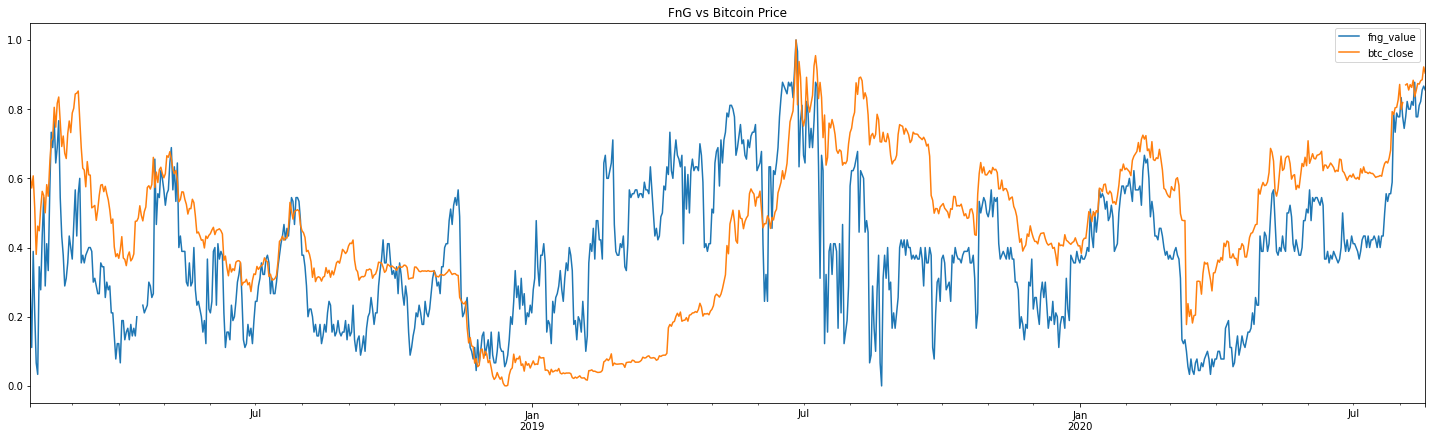

In [6]:
df_scaled.plot(figsize=(25, 7), title='FnG vs Bitcoin Price')

In [7]:
sentiment_correlation = df.corr()
sentiment_correlation

,fng_value,btc_close
fng_value,1.000000,0.414267
btc_close,0.414267,1.000000


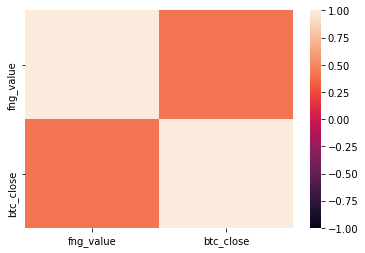

In [8]:
import seaborn as sns

sns.heatmap(sentiment_correlation, vmin=-1, vmax=1)

### Read VADER, TextBlob scores. Note Watson score is only availble for 08/10

In [9]:
df_08_10 = pd.read_csv(Path('./btc_sentiment_2020-08-10.csv'), index_col=0)
df_08_10.describe()

,compound,positive,negative,neutral,textblob_polarity,watson_score
count,14070.000000,14070.000000,14070.000000,14070.000000,14070.000000,14070.000000
mean,0.263628,0.244359,0.074722,0.680919,0.161613,-0.030185
std,0.426294,0.172095,0.132746,0.154866,0.290231,0.568859
min,-0.943200,0.000000,0.000000,0.000000,-1.000000,-0.999354
25%,0.025800,0.135000,0.000000,0.579000,0.000000,-0.590722
50%,0.361200,0.216000,0.000000,0.714000,0.050000,0.000000
75%,0.585900,0.366000,0.142000,0.805000,0.350000,0.336543
max,0.962300,1.000000,0.853000,0.927000,1.000000,0.999849


In [10]:
df_08_10 = pd.read_csv(Path('./btc_sentiment_2020-08-10.csv'))
df_08_11 = pd.read_csv(Path('./btc_sentiment_2020-08-11.csv'))
df_08_12 = pd.read_csv(Path('./btc_sentiment_2020-08-12.csv'))
df_08_13 = pd.read_csv(Path('./btc_sentiment_2020-08-13.csv'))
df_08_14 = pd.read_csv(Path('./btc_sentiment_2020-08-14.csv'))
df_08_15 = pd.read_csv(Path('./btc_sentiment_2020-08-15.csv'))
df_08_16 = pd.read_csv(Path('./btc_sentiment_2020-08-16.csv'))
df_08_17 = pd.read_csv(Path('./btc_sentiment_2020-08-17.csv'))
df_08_18 = pd.read_csv(Path('./btc_sentiment_2020-08-18.csv'))
df_08_10.head()

,Unnamed: 0,date,text,compound,positive,negative,neutral,textblob_polarity,watson_score
0,0,2020-08-10 23:59:56,bitcoin greatest social network time,0.6369,0.512,0.0,0.488,0.516667,0.634796
1,1,2020-08-10 23:59:52,0.5 bitcoin giveaway contest'm small giveaway ...,0.5106,0.231,0.0,0.769,0.075000,0.000000
2,2,2020-08-10 23:59:47,know like dont know get bitcoin,0.3612,0.333,0.0,0.667,0.000000,0.000000
3,3,2020-08-10 23:59:40,"cryptocurrency top list bitcoin btc 1.52 11,85...",0.2023,0.122,0.0,0.878,0.500000,0.000000
4,4,2020-08-10 23:59:37,wow everything know facebook guy thread says n...,0.5859,0.257,0.0,0.743,0.100000,-0.813251


In [11]:
df_08_10 = df_08_10.loc[:,['compound','textblob_polarity']]
df_08_10 = pd.DataFrame(scaler.fit_transform(df_08_10), columns=df_08_10.columns, index=df_08_10.index)

df_08_11 = df_08_11.loc[:,['compound','textblob_polarity']]
df_08_11 = pd.DataFrame(scaler.fit_transform(df_08_11), columns=df_08_11.columns, index=df_08_11.index)


df_08_12 = df_08_12.loc[:,['compound','textblob_polarity']]
df_08_12 = pd.DataFrame(scaler.fit_transform(df_08_12), columns=df_08_12.columns, index=df_08_12.index)

df_08_13 = df_08_13.loc[:,['compound','textblob_polarity']]
df_08_13 = pd.DataFrame(scaler.fit_transform(df_08_13), columns=df_08_13.columns, index=df_08_13.index)

df_08_14 = df_08_14.loc[:,['compound','textblob_polarity']]
df_08_14 = pd.DataFrame(scaler.fit_transform(df_08_14), columns=df_08_14.columns, index=df_08_14.index)

df_08_15 = df_08_15.loc[:,['compound','textblob_polarity']]
df_08_15 = pd.DataFrame(scaler.fit_transform(df_08_15), columns=df_08_15.columns, index=df_08_15.index)

df_08_16 = df_08_16.loc[:,['compound','textblob_polarity']]
df_08_16 = pd.DataFrame(scaler.fit_transform(df_08_16), columns=df_08_16.columns, index=df_08_16.index)

df_08_17 = df_08_17.loc[:,['compound','textblob_polarity']]
df_08_17 = pd.DataFrame(scaler.fit_transform(df_08_17), columns=df_08_17.columns, index=df_08_17.index)

df_08_18 = df_08_18.loc[:,['compound','textblob_polarity']]
df_08_18 = pd.DataFrame(scaler.fit_transform(df_08_18), columns=df_08_18.columns, index=df_08_18.index)


In [12]:
sentiment_df = df_scaled[(df_scaled.index >= '2020-08-10') & (df_scaled.index <= '2020-08-18')]['fng_value']

In [13]:
data = {
    'date': [
        '2020-08-10',
        '2020-08-11',
        '2020-08-12',
        '2020-08-13',
        '2020-08-14',
        '2020-08-15',
        '2020-08-16',
        '2020-08-17',
        '2020-08-18',
    ],
    'vader_sentiment': [
        df_08_10['compound'].mean(),
        df_08_11['compound'].mean(),
        df_08_12['compound'].mean(),
        df_08_13['compound'].mean(),
        df_08_14['compound'].mean(),
        df_08_15['compound'].mean(),
        df_08_16['compound'].mean(),
        df_08_17['compound'].mean(),
        df_08_18['compound'].mean()
    ],
    'textblob_polarity': [
        df_08_10['textblob_polarity'].mean(),
        df_08_11['textblob_polarity'].mean(),
        df_08_12['textblob_polarity'].mean(),
        df_08_13['textblob_polarity'].mean(),
        df_08_14['textblob_polarity'].mean(),
        df_08_15['textblob_polarity'].mean(),
        df_08_16['textblob_polarity'].mean(),
        df_08_17['textblob_polarity'].mean(),
        df_08_18['textblob_polarity'].mean()
    ]
}
df = pd.DataFrame(data) 

df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)

sentiment_df = pd.concat([sentiment_df, df], axis=1)
sentiment_df


,fng_value,vader_sentiment,textblob_polarity
2020-08-10,0.811111,0.633339,0.580806
2020-08-11,0.877778,0.649462,0.567082
2020-08-12,0.777778,0.662226,0.570373
2020-08-13,0.777778,0.653814,0.571110
2020-08-14,0.811111,0.687003,0.618867
2020-08-15,0.822222,0.695060,0.608604
2020-08-16,0.855556,0.663135,0.581323
2020-08-17,0.866667,0.626820,0.561543
2020-08-18,0.855556,0.637604,0.546966


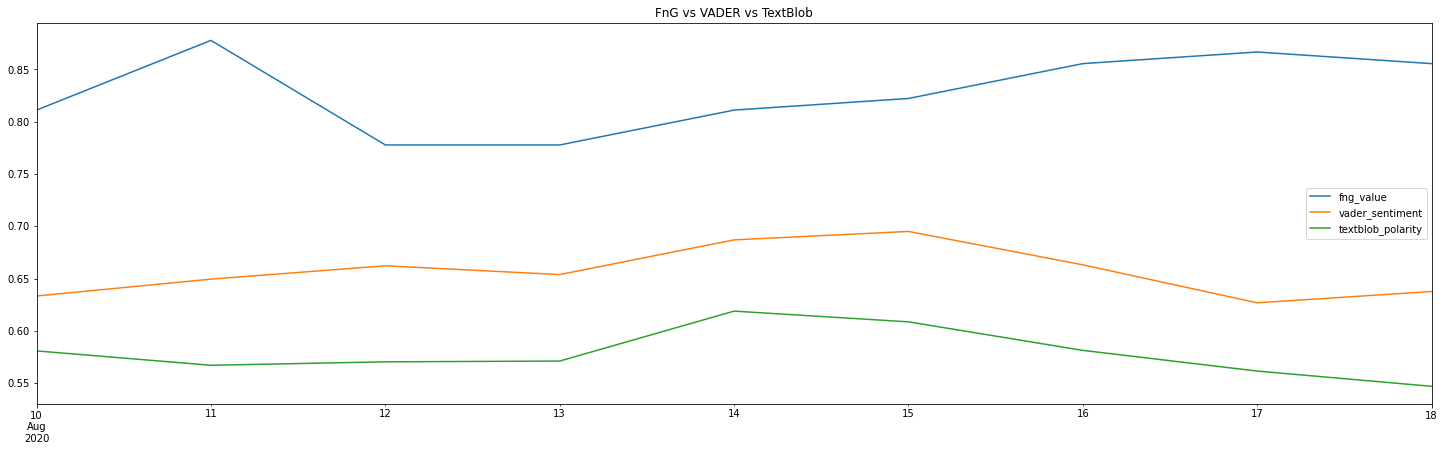

In [14]:
sentiment_df.plot(figsize=(25, 7), title='FnG vs VADER vs TextBlob')